<a href="https://colab.research.google.com/github/moonsejin315/Python/blob/main/Embedding%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import openai

OPENAI_API_KEY = api_key
#Set your API key here
openai.api_key = OPENAI_API_KEY

In [2]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#List of color words
color_words = ["red", "blue", "yellow", "green", "violet", "cyan", "black", "white"]

In [3]:
#Function to get embeddings for a list of words using OpenAI API
def get_embeddings(words):
  response = openai.Embedding.create(
      input = words,
      model = "text-embedding-ada-002"
  )
  return np.array([data['embedding'] for data in response['data']])

color_embeddings = get_embeddings(color_words)

print(color_words)
print(color_embeddings.shape)

['red', 'blue', 'yellow', 'green', 'violet', 'cyan', 'black', 'white']
(8, 1536)


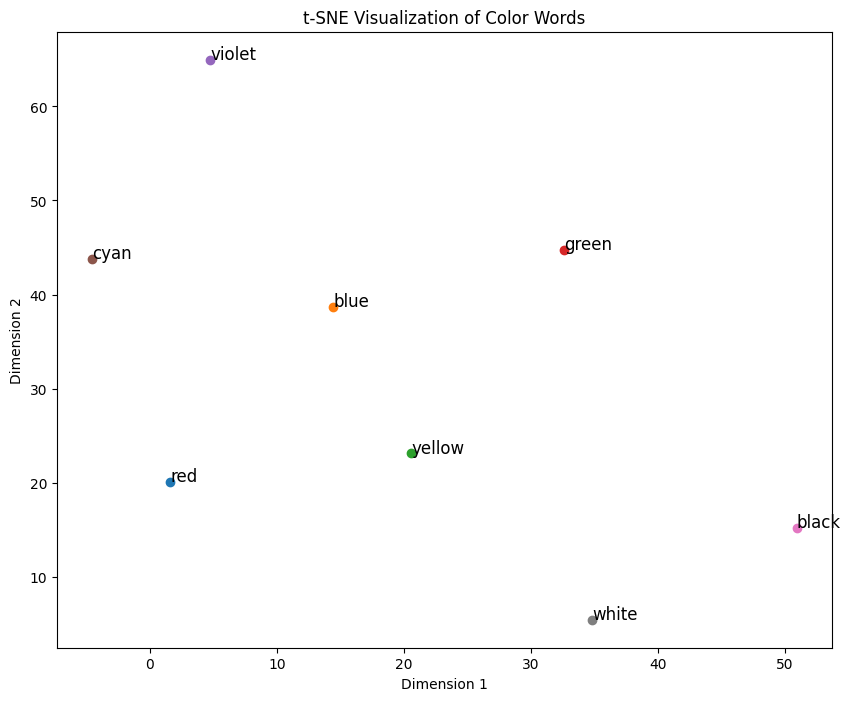

In [4]:
#Use t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
color_embeddings_2d = tsne.fit_transform(color_embeddings)

#Plot the 2D t-SNE representation
plt.figure(figsize=(10, 8))
for i, word in enumerate(color_words):
  plt.scatter(color_embeddings_2d[i, 0], color_embeddings_2d[i, 1])
  plt.text(color_embeddings_2d[i, 0] + 0.02, color_embeddings_2d[i, 1] + 0.02, word, fontsize = 12)

plt.title("t-SNE Visualization of Color Words")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [5]:
import openai
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

openai.api_key = OPENAI_API_KEY

In [6]:
#Function to get embeddings for a list of texts using OpenAI API
def get_embeddings(texts, model = "text-embedding-ada-002"):
  response = openai.Embedding.create(
      input = texts,
      model = model
  )
  return np.array([data['embedding'] for data in response['data']])

#List of documnets
documents = [
    "The ocean is blue",
    "The sun is bright",
    "The sky I fell iin love with is rarely blue."
]

#Compute embeddings for the documents
document_embeddings = get_embeddings(documents)

In [7]:
from warnings import simplefilter
#Function to find the most similar document
def find_most_similar_document(query, document_embeddings):
  query_embedding = get_embeddings([query])[0]
  similarities = cosine_similarity([query_embedding], document_embeddings)
  most_similar_index = np.argmax(similarities)
  return documents[most_similar_index], similarities[0][most_similar_index]

query = "The sky is blue."
most_similar_documnet, similarity = find_most_similar_document(query, document_embeddings)

print("Query:", query)
print("Most similar document:", most_similar_documnet)
print("Similarity:", similarity)

Query: The sky is blue.
Most similar document: The ocean is blue
Similarity: 0.8992992796756701


In [8]:
import openai
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
def get_embeddings(texts, model="text-embedding-ada-002"):
    response = openai.Embedding.create(
        input=texts,
        model=model
    )
    return np.array([data["embedding"] for data in response["data"]])
reviews = [
    "I loved this movie! It was fantastic.",
    "The film was terrible, I hated it.",
    "What an amazing movie, had a great time watching it.",
    "The movie was a complete waste of time, very boring.",
    "Absolutely wonderful! A must-watch.",
    "Awful film. Will never watch it again."
]
labels = [1,0,1,0,1,0]
review_embeddings = get_embeddings(reviews)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(review_embeddings, labels, test_size=0.2, random_state=42)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.2f}")

Accuracy : 1.00


In [12]:
def classify_review(review):
  review_embedding = get_embeddings([review])[0]
  prediction = classifier.predict([review_embedding])[0]
  return "Positive" if prediction == 1 else "Negative"

new_review = "The movie was fantastic and very entertaining"
classfication = classify_review(new_review)
print(f"Review: {new_review}")
print(f"Classification: {classfication}")

Review: The movie was fantastic and very entertaining
Classification: Positive
